In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/recom_purchase_data.csv")
df.head()

,user_id,product_id,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,...,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity,purchase_label
0,78517,1645,Books,842.23,2,155,24,Other,Urban,False,...,-0.28,0.68,0.04,Night,Thursday,Summer,Debit Card,False,0.54,0
1,52887,100,Books,253.76,3,331,43,Other,Suburban,False,...,0.28,0.11,0.89,Morning,Saturday,Summer,Debit Card,False,0.77,0
2,59395,585,Books,483.65,2,236,64,Female,Rural,True,...,0.23,0.35,0.99,Evening,Tuesday,Fall,Debit Card,False,0.14,0
3,54739,3774,Groceries,459.37,2,227,34,Female,Urban,False,...,0.93,0.73,0.16,Afternoon,Tuesday,Spring,Credit Card,False,0.18,0
4,42723,2119,Groceries,150.11,2,214,51,Female,Urban,True,...,0.11,0.26,0.17,Night,Wednesday,Spring,PayPal,False,0.66,0


# Automation Package - PYCARET

In [ ]:
!pip install --pre pycaret[full] -U --extra-index-url https://pypi.org/simple


Looking in indexes: https://pypi.org/simple, https://pypi.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 77.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dash[testing] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dash[testing] to determine which version is compatible with othe

In [ ]:
# splitting data into training and testing
data = df.sample(frac=0.80, random_state=None).reset_index(drop=True)
data_test = df.drop(data.index).reset_index(drop=True)
print(data.shape, data_test.shape)

(48000, 52) (12000, 52)


In [ ]:
data

,user_id,product_id,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,...,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity,purchase_label
0,95079,1009,Clothing,963.51,5,276,20,Male,Suburban,True,...,0.03,0.13,0.86,Evening,Saturday,Summer,Cash,False,0.88,0
1,57079,226,Clothing,651.48,3,141,55,Other,Suburban,False,...,0.91,0.89,0.98,Morning,Saturday,Winter,Credit Card,True,0.88,0
2,42706,1125,Furniture,195.38,5,31,23,Male,Suburban,False,...,0.18,0.84,0.67,Evening,Tuesday,Winter,Cash,True,0.68,1
3,20479,922,Books,565.71,3,497,24,Male,Urban,False,...,0.63,0.81,0.86,Morning,Wednesday,Fall,Debit Card,False,0.05,0
4,46722,4220,Groceries,886.53,1,295,65,Female,Urban,False,...,0.61,0.91,0.28,Evening,Thursday,Fall,Debit Card,False,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,48376,1406,Groceries,626.87,3,50,32,Other,Rural,False,...,-0.40,0.04,0.14,Afternoon,Wednesday,Spring,Cash,True,0.33,0
47996,39327,2816,Electronics,700.37,3,422,33,Male,Rural,False,...,0.15,0.52,0.02,Morning,Friday,Fall,Debit Card,True,0.75,0
47997,36618,1256,Furniture,500.76,2,490,55,Other,Suburban,True,...,-0.15,0.33,0.45,Night,Tuesday,Fall,PayPal,False,0.11,0
47998,42523,776,Clothing,336.76,4,192,39,Female,Urban,False,...,0.22,0.56,0.18,Morning,Monday,Summer,Debit Card,False,0.30,0


In [ ]:
from pycaret.classification import *

In [ ]:
classification_model = setup(data=data, target='purchase_label', session_id=103)

,Description,Value
0,Session id,103
1,Target,purchase_label
2,Target type,Binary
3,Original data shape,"(48000, 52)"
4,Transformed data shape,"(48000, 108)"
5,Transformed train set shape,"(33600, 108)"
6,Transformed test set shape,"(14400, 108)"
7,Numeric features,27
8,Categorical features,20
9,Preprocess,True


In [ ]:
# check model performance
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,0.9999,0.9999,1.0000,0.9999,0.9999,0.9999,1.3280
ada,Ada Boost Classifier,1.0000,1.0000,0.9999,1.0000,0.9999,0.9999,0.9999,5.0210
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,0.9999,0.9999,0.9999,0.9999,20.0470
catboost,CatBoost Classifier,0.9993,0.9999,0.9976,0.9993,0.9984,0.9980,0.9980,17.5590
xgboost,Extreme Gradient Boosting,0.9785,0.9999,0.8969,0.9992,0.9446,0.9314,0.9339,2.0910
lightgbm,Light Gradient Boosting Machine,0.9662,1.0000,0.8367,0.9999,0.8974,0.8787,0.8924,3.8230
rf,Random Forest Classifier,0.9048,0.9960,0.5407,0.9989,0.7015,0.6508,0.6943,5.6680
et,Extra Trees Classifier,0.8962,0.9758,0.5798,0.8769,0.6978,0.6382,0.6583,4.5960
qda,Quadratic Discriminant Analysis,0.8419,0.9198,0.6106,0.6633,0.4942,0.4341,0.4816,1.3970
lda,Linear Discriminant Analysis,0.8337,0.9061,0.5026,0.6219,0.5557,0.4548,0.4589,1.4350


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=103, splitter='best')

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9997,0.9993,0.9986,1.0000,0.9993,0.9991,0.9991
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# hyperparameter tuning
tuned_dt = tune_model(dt)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:59:20
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9997,0.9993,0.9986,1.0000,0.9993,0.9991,0.9991
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


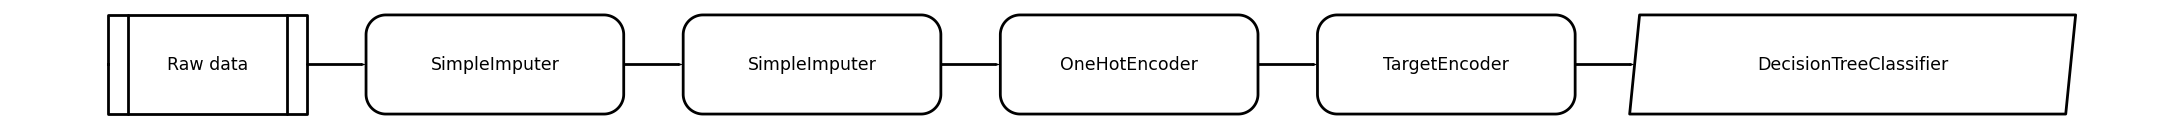

In [ ]:
# evaluate the model
evaluate_model(dt)

In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9205,0.9996,0.6158,1.0000,0.7622,0.7177,0.7482
1,0.9991,1.0000,0.9957,1.0000,0.9978,0.9973,0.9973
2,0.9994,1.0000,0.9986,0.9986,0.9986,0.9982,0.9982
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9994,1.0000,0.9971,1.0000,0.9986,0.9982,0.9982
6,0.9146,1.0000,0.5876,1.0000,0.7403,0.6932,0.7283
7,0.9997,1.0000,0.9986,1.0000,0.9993,0.9991,0.9991
8,0.9247,1.0000,0.6365,1.0000,0.7779,0.7352,0.7624


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
# hyperparameter tuning
tuned_lightgbm = tune_model(lightgbm)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:32:23
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9994,1.0000,0.9971,1.0000,0.9986,0.9982,0.9982
1,0.9991,1.0000,0.9957,1.0000,0.9978,0.9973,0.9973
2,0.9997,1.0000,0.9986,1.0000,0.9993,0.9991,0.9991
3,0.9997,1.0000,0.9986,1.0000,0.9993,0.9991,0.9991
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9994,1.0000,0.9971,1.0000,0.9986,0.9982,0.9982
6,0.9997,1.0000,1.0000,0.9986,0.9993,0.9991,0.9991
7,0.9997,1.0000,0.9986,1.0000,0.9993,0.9991,0.9991
8,0.9997,1.0000,0.9986,1.0000,0.9993,0.9991,0.9991


In [27]:
# evaluate the model
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…